<a href="https://colab.research.google.com/github/sharifashik591/PredcitHousePrice_with_ANN/blob/main/HousePricePredction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
from keras import regularizers

Load Dataset


In [4]:
from google.colab import files
files.upload()

Saving housepricedata.csv to housepricedata (1).csv


{'housepricedata.csv': b'LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice\r\n8450,7,5,856,2,1,3,8,0,548,1\r\n9600,6,8,1262,2,0,3,6,1,460,1\r\n11250,7,5,920,2,1,3,6,1,608,1\r\n9550,7,5,756,1,0,3,7,1,642,0\r\n14260,8,5,1145,2,1,4,9,1,836,1\r\n14115,5,5,796,1,1,1,5,0,480,0\r\n10084,8,5,1686,2,0,3,7,1,636,1\r\n10382,7,6,1107,2,1,3,7,2,484,1\r\n6120,7,5,952,2,0,2,8,2,468,0\r\n7420,5,6,991,1,0,2,5,2,205,0\r\n11200,5,5,1040,1,0,3,5,0,384,0\r\n11924,9,5,1175,3,0,4,11,2,736,1\r\n12968,5,6,912,1,0,2,4,0,352,0\r\n10652,7,5,1494,2,0,3,7,1,840,1\r\n10920,6,5,1253,1,1,2,5,1,352,0\r\n6120,7,8,832,1,0,2,5,0,576,0\r\n11241,6,7,1004,1,0,2,5,1,480,0\r\n10791,4,5,0,2,0,2,6,0,516,0\r\n13695,5,5,1114,1,1,3,6,0,576,0\r\n7560,5,6,1029,1,0,3,6,0,294,0\r\n14215,8,5,1158,3,1,4,9,1,853,1\r\n7449,7,7,637,1,0,3,6,1,280,0\r\n9742,8,5,1777,2,0,3,7,1,534,1\r\n4224,5,7,1040,1,0,3,6,1,572,0\r\n8246,5,8,1060,1,0,3,6,1,270,0\r\n14230,8,5,1566,2,

Import Library

In [9]:
df=pd.read_csv('housepricedata.csv')

In [11]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [12]:
data=df.values
print(data)

[[ 8450     7     5 ...     0   548     1]
 [ 9600     6     8 ...     1   460     1]
 [11250     7     5 ...     1   608     1]
 ...
 [ 9042     7     9 ...     2   252     1]
 [ 9717     5     6 ...     0   240     0]
 [ 9937     5     6 ...     0   276     0]]


In [13]:
features=data[:,0:10]
target=data[:,10]

In [14]:
mms=MinMaxScaler()


In [15]:
features_scale=mms.fit_transform(features)

In [16]:
#split dataset

x_train,x_val_test,y_train,y_val_test=train_test_split(features_scale,target,test_size=0.2)

In [17]:
#split validation and test data

x_val,x_test,y_val,y_test=train_test_split(x_val_test,y_val_test,test_size=0.5)

In [22]:
 model=Sequential()
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01) ,input_dim=10)) 
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01))) 
model.add(Dropout(0.3))
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01))) 
model.add(Dropout(0.3))
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01))) 
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))) 

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model_history=model.fit(x_train,
                        y_train,
                        batch_size=32,
                        epochs=100,
                        validation_data=(x_val,y_val))

Epoch 1/100
37/37 [==============================] - 15s 17ms/step - loss: 2.5780 - accuracy: 0.5310 - val_loss: 1.9782 - val_accuracy: 0.4658
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 1.8276 - accuracy: 0.5485 - val_loss: 1.4400 - val_accuracy: 0.8219
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 1.3499 - accuracy: 0.7591 - val_loss: 1.0923 - val_accuracy: 0.8219
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 1.0264 - accuracy: 0.7939 - val_loss: 0.8163 - val_accuracy: 0.8562
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7674 - accuracy: 0.8367 - val_loss: 0.6209 - val_accuracy: 0.8425
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.8531 - val_loss: 0.5429 - val_accuracy: 0.8836
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5674 - accuracy: 0.8651 - val_loss: 0.5142 - val_accuracy: 0.8767
Epoch 8/100

In [52]:
model.evaluate(x_test,y_test,batch_size=16)[1]

10/10 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.8288


0.8287671208381653

In [39]:
predction=model.predict(x_test)

predction=[1 if i>=.85 else 0 for i in predction]
print(predction)
print(y_test)

[0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
[1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1]


VIsulize the model

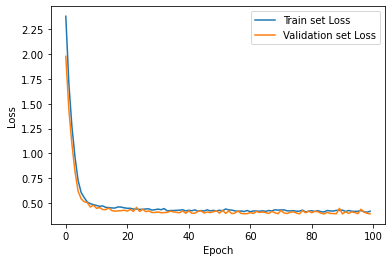

In [26]:
plt.plot(model_history.history['loss'],label='Train set Loss')
plt.plot(model_history.history['val_loss'],label='Validation set Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

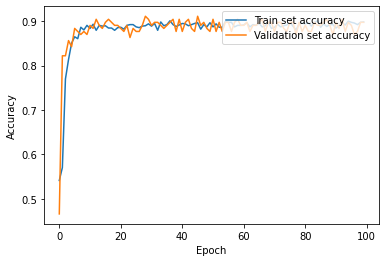

In [41]:
plt.plot(model_history.history['accuracy'],label='Train set accuracy')
plt.plot(model_history.history['val_accuracy'],label='Validation set accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

save Model

In [54]:
model_json=model.to_json()

with open ('model.json','w') as file:
  file.write(model_json)

model.save_weights('HousePricePredctionModel.h5')

Load file

In [55]:
from keras.models import model_from_json
file=open('model.json','r')

In [56]:
load_json=file.read()
file.close()

In [57]:
model=model_from_json(load_json)
model.load_weights('HousePricePredctionModel.h5')